In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

%matplotlib inline

## Data Loading

### Character Metadata

In [2]:
df_character = pd.read_csv("./MovieSummaries/character.metadata.tsv", sep='\t', header=None)
df_character.columns = ['Wikipedia movie ID', 
'Freebase movie ID', 
'Movie release date',
'Character name',
'Actor date of birth', 
'Actor gender', 
'Actor height(in meters)', 
'Actor ethnicity(Freebase ID)', 
'Actor name', 
'Actor age at movie release',
'Freebase character/actor map ID',
'Freebase character ID',
'Freebase actor ID']
df_character.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height(in meters),Actor ethnicity(Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [3]:
# number of samples without missing values
print("{}/{} samples without any missing value.".format(len(df_character.dropna()), len(df_character)))


45264/450669 samples without any missing value.


### Movie Metadata

In [4]:
df_movie = pd.read_csv("./MovieSummaries/movie.metadata.tsv", sep='\t', header=None)
df_movie.columns = ['Wikipedia movie ID', 'Freebase movie ID', 'Name', 'Release date', 'Revenue', 'Runtime', 'Languages', 'Countries', 'Genres']
df_movie.head()

,Wikipedia movie ID,Freebase movie ID,Name,Release date,Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


### Plot summary

In [5]:
df_summary = pd.read_csv("./MovieSummaries/plot_summaries.txt", sep='\t', header=None)
df_summary.columns = ['Wikipedia movie ID', 'Summary']
df_summary.head()

,Wikipedia movie ID,Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


### Name Cluster

In [6]:
df_name_cluster = pd.read_csv("./MovieSummaries/name.clusters.txt", sep='\t', header=None)
df_name_cluster.columns = ['Character Name', 'Freebase Movie ID']
df_name_cluster.head()

,Character Name,Freebase Movie ID
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn


### Tvtropes Cluster

In [7]:
chartype_path = "./MovieSummaries/tvtropes.clusters.txt"


def read_tvtropes(char_cluster_path):
    df = pd.read_csv(char_cluster_path, sep='\t', header=None)
    df.columns = ['Type', 'raw info']
    # extract information from "Raw Info"
    for i in range(len(df)):
        char_info = json.loads(df.loc[i, 'raw info'])
        for name,val in char_info.items():
            df.loc[i, name.title()] = val
    df.drop('raw info', axis=1, inplace=True)
    return df

df_chartype = read_tvtropes(chartype_path)
print(df_chartype.shape)
df_chartype.head()

(501, 5)


,Type,Char,Movie,Id,Actor
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


## Data Wrangling

#### Release Date Processing

In [8]:
print("{}/{} samples without any missing value.".format(len(df_movie.dropna()), len(df_movie)))
df_movie = df_movie.dropna().reset_index(drop=True)

8243/81741 samples without any missing value.


In [9]:
# transform Release date to integer, month and day are dropped for simplicity.
df_movie["Release date"] = df_movie["Release date"].apply(lambda x: int(x.split('-')[0]))

In [10]:
# only consider movies released after 1920
df_movie = df_movie[df_movie["Release date"] >= 1920]

In [11]:
# plot Release date - Revenue plot
# g = sns.jointplot(x=df_movie["Release date"], y=np.log(df_movie["Revenue"]), kind="reg")
# g.set_axis_labels(ylabel="log of Revenue")

#### Revenue Processing

In [12]:
def ratio_per_year(x):
    sum = x.Revenue.sum()
    return x.Revenue/sum

In [13]:
group_by_year = df_movie.groupby("Release date").apply(ratio_per_year)
group_by_year

Release date      
1920          2574    1.000000
1921          593     0.569620
              3314    0.113924
              4117    0.316456
1923          12      0.456395
                        ...   
2012          7959    0.002308
              7982    0.012923
              8037    0.010032
              8061    0.004218
              8139    0.003447
Name: Revenue, Length: 8240, dtype: float64

In [14]:
for i,v in group_by_year.iteritems():
    df_movie.loc[i[1], "Revenue_ratio"] = v

df_movie

,Wikipedia movie ID,Freebase movie ID,Name,Release date,Revenue,Runtime,Languages,Countries,Genres,Revenue_ratio
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",0.000946
1,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",0.153143
2,171005,/m/016ywb,Henry V,1989,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",0.001675
3,77856,/m/0kcn7,Mary Poppins,1964,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",0.303695
4,612710,/m/02wjqm,New Rose Hotel,1999,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",0.000002
...,...,...,...,...,...,...,...,...,...,...
8238,1191380,/m/04f_y7,Wilde,1997,2158775.0,118.0,"{""/m/02h40lc"": ""English Language""}","{""/m/014tss"": ""Kingdom of Great Britain"", ""/m/...","{""/m/0hn10"": ""LGBT"", ""/m/017fp"": ""Biography"", ...",0.000175
8239,54540,/m/0f7hw,Coming to America,1988,288752301.0,117.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/03p5xs"": ""...",0.059681
8240,7761830,/m/0kvgqb,Spaced Invaders,1990,15369573.0,100.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3mt0"": ""Alien Film"", ""/m/06n90"": ""Scie...",0.002320
8241,1918494,/m/0660qx,State and Main,2000,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/0gf28"": ""Parody"", ""/m/09n5t_"": ""Americana...",0.000555


## Data Analysis

### Relationship between Movie Country and Movie Revenue

In [15]:
df_movie.head()

,Wikipedia movie ID,Freebase movie ID,Name,Release date,Revenue,Runtime,Languages,Countries,Genres,Revenue_ratio
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",0.000946
1,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",0.153143
2,171005,/m/016ywb,Henry V,1989,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",0.001675
3,77856,/m/0kcn7,Mary Poppins,1964,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",0.303695
4,612710,/m/02wjqm,New Rose Hotel,1999,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",0.000002


In [16]:
from collections import Counter, defaultdict

# movie revenue for each country
country_revenue = defaultdict(list)
for index, row in df_movie.iterrows():
    countries = json.loads(row["Countries"]).values()
    if len(countries) >= 2:
        continue
    for country in countries:
        country_revenue[country].append(row["Revenue"])

print("Total {} countries.".format(len(country_revenue)))

Total 40 countries.


Top 10 country, revenue


Text(0.5, 1.0, 'average movie revenue for top 10 countries')

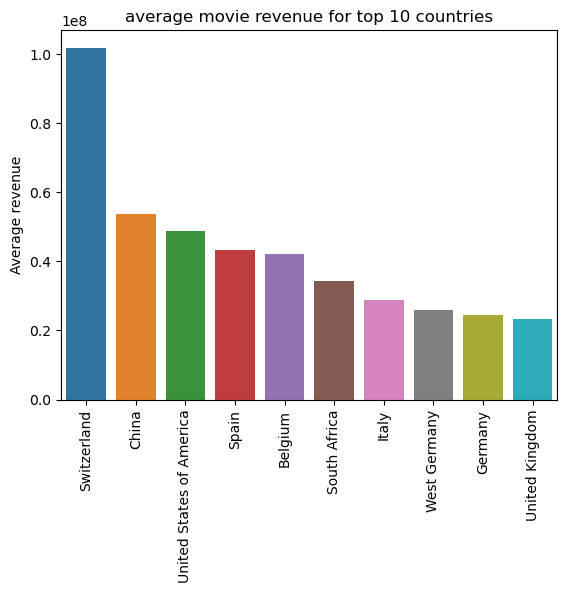

In [17]:
# mean for each country
mean_ctry_rev = {k:sum(v)/len(v) for k,v in country_revenue.items()}
# sroted mean for each country
sorted_mcr = sorted(mean_ctry_rev.items(), key=lambda x:x[1], reverse=True)
sorted_mcr = pd.Series(*list(zip(*sorted_mcr))[::-1], name="Average revenue")

topk = 10
print("Top {} country, revenue".format(topk))
sns.barplot(x=sorted_mcr.index[:topk], y=sorted_mcr[:topk])
plt.ylabel("Average revenue")
plt.xticks(rotation=90)
plt.title("average movie revenue for top {} countries".format(topk))

### Relationship between Movie Language and Movie Revenue

In [18]:
from collections import Counter, defaultdict

# movie revenue for each language
language_revenue = defaultdict(list)
language_count = Counter()
for index, row in df_movie.iterrows():
    languages = json.loads(row["Languages"]).values()
    # if len(languages) >= 2:
    #     continue
    for language in languages:
        language_count[language] += 1
        language_revenue[language].append(row["Revenue"])

print("Total {} languages.".format(len(country_revenue)))

Total 40 languages.


Top 10 language, revenue


Text(0.5, 1.0, 'average movie revenue for top 10 languages')

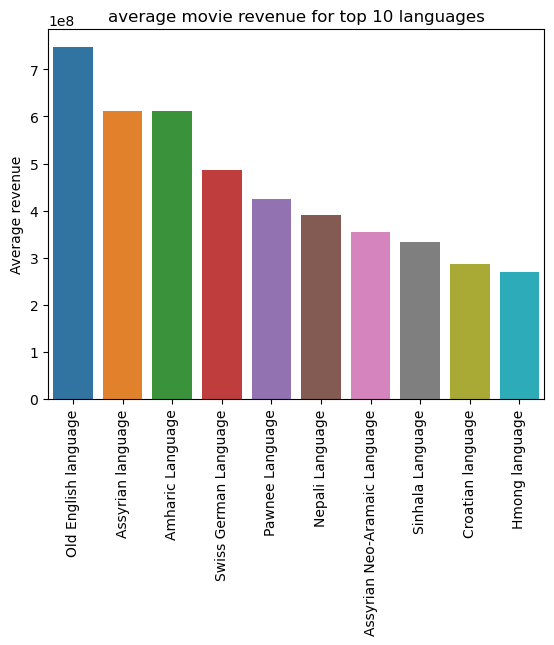

In [19]:
# mean for each language
mean_lang_rev = {k:sum(v)/len(v) for k,v in language_revenue.items()}
# sroted mean for each language
sorted_mlr = sorted(mean_lang_rev.items(), key=lambda x:x[1], reverse=True)
sorted_mlr = pd.Series(*list(zip(*sorted_mlr))[::-1], name="Average revenue")

topk = 10
print("Top {} language, revenue".format(topk))
sns.barplot(x=sorted_mlr.index[:topk], y=sorted_mlr[:topk])
plt.ylabel("Average revenue")
plt.xticks(rotation=90)
plt.title("average movie revenue for top {} languages".format(topk))

Text(0.5, 1.0, 'Revenue - Release data')

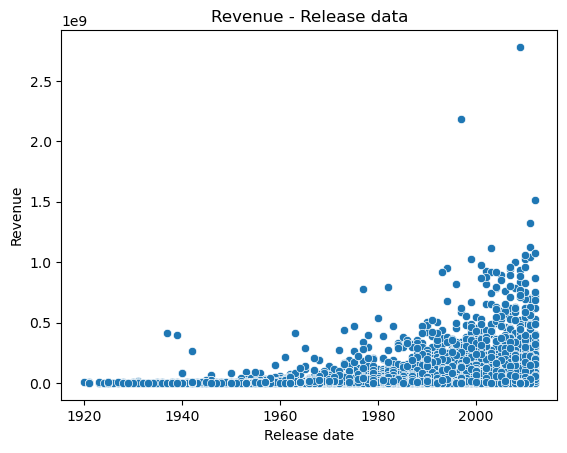

In [20]:
# Year - Revnue
sns.scatterplot(x=df_movie["Release date"], y=df_movie["Revenue"])
plt.title("Revenue - Release data")

### Relationship between Genres and Movie Revenue

In [21]:
from collections import Counter, defaultdict

# movie revenue for each language
genre_revenue = defaultdict(list)
genre_count = Counter()
for index, row in df_movie.iterrows():
    genres = json.loads(row["Genres"]).values()
    for genre in genres:
        genre_count[genre] += 1
        genre_revenue[genre].append(row["Revenue"])

print("Total {} genres.".format(len(country_revenue)))

Total 40 genres.


Top 20 genre, revenue


Text(0.5, 1.0, 'average movie revenue for top 20 genres')

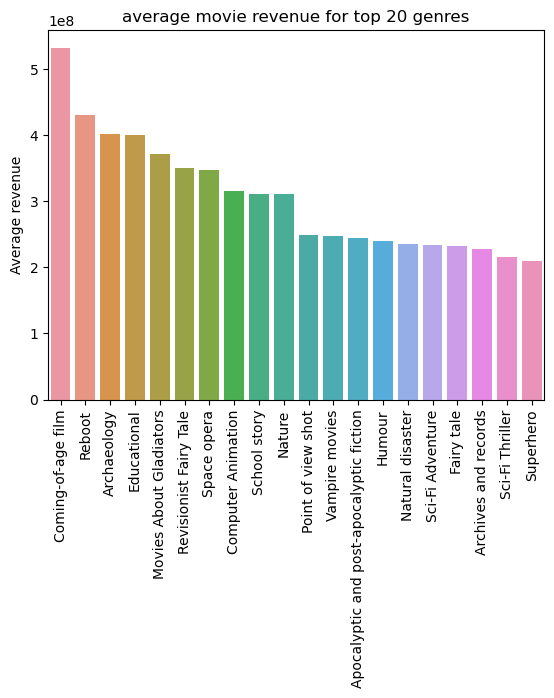

In [22]:
# mean for each genre
mean_genre_rev = {k:sum(v)/len(v) for k,v in genre_revenue.items()}
# sroted mean for each genre
sorted_mgr = sorted(mean_genre_rev.items(), key=lambda x:x[1], reverse=True)
sorted_mgr = pd.Series(*list(zip(*sorted_mgr))[::-1], name="Average revenue")

topk = 20
print("Top {} genre, revenue".format(topk))
sns.barplot(x=sorted_mgr.index[:topk], y=sorted_mgr[:topk])
plt.ylabel("Average revenue")
plt.xticks(rotation=90)
plt.title("average movie revenue for top {} genres".format(topk))

### Relationship between Actor and Movie Revenue

In [23]:
df_actor_movie = df_character.merge(df_movie, on="Freebase movie ID", how="left").dropna()

print(df_actor_movie.shape)
df_actor_movie.head()

(21394, 22)


,Wikipedia movie ID_x,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height(in meters),Actor ethnicity(Freebase ID),Actor name,Actor age at movie release,...,Freebase actor ID,Wikipedia movie ID_y,Name,Release date,Revenue,Runtime,Languages,Countries,Genres,Revenue_ratio
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,...,/m/0346l4,975900.0,Ghosts of Mars,2001.0,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",0.000946
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,...,/m/01vw26l,975900.0,Ghosts of Mars,2001.0,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",0.000946
5,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,...,/m/0418ft,975900.0,Ghosts of Mars,2001.0,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",0.000946
76,612710,/m/02wjqm,1999-10-01,Sandii,1975-09-20,F,1.680,/m/0222qb,Asia Argento,24.0,...,/m/028pzq,612710.0,New Rose Hotel,1999.0,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",0.000002
77,612710,/m/02wjqm,1999-10-01,Fox,1943-03-31,M,1.830,/m/01qhm_,Christopher Walken,56.0,...,/m/016fjj,612710.0,New Rose Hotel,1999.0,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",0.000002


<AxesSubplot:xlabel='Actor age at movie release', ylabel='Revenue'>

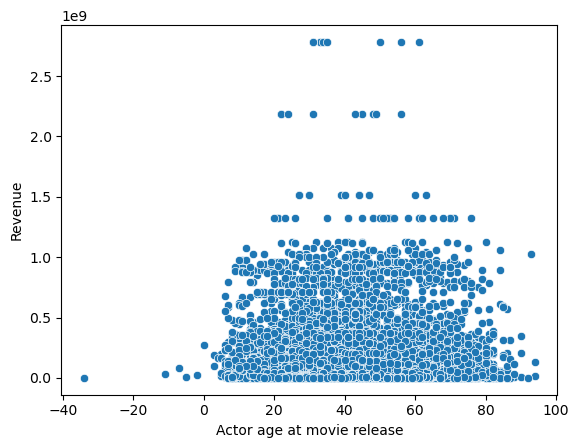

In [24]:
sns.scatterplot(data=df_actor_movie, x="Actor age at movie release", y="Revenue")